<a href="https://colab.research.google.com/github/yahya05/Bank/blob/main/bank_marketing_compaign.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [72]:
# Data Analysis and visualization tools
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px

from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import FunctionTransformer
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder

import datetime

In [3]:


df=pd.read_csv("/content/drive/MyDrive/Data/bank.csv")
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [4]:
df['previous'].unique()

array([ 0,  1,  4,  2,  3, 10,  7,  9,  5, 29,  6, 13, 17,  8, 11, 30, 22,
       58, 21, 14, 26, 12, 19, 55, 23, 15, 20, 27, 16, 41, 40, 28, 18, 37])

In [5]:
df.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
11157,33,blue-collar,single,primary,no,1,yes,no,cellular,20,apr,257,1,-1,0,unknown,no
11158,39,services,married,secondary,no,733,no,no,unknown,16,jun,83,4,-1,0,unknown,no
11159,32,technician,single,secondary,no,29,no,no,cellular,19,aug,156,2,-1,0,unknown,no
11160,43,technician,married,secondary,no,0,no,yes,cellular,8,may,9,2,172,5,failure,no
11161,34,technician,married,secondary,no,0,no,no,cellular,9,jul,628,1,-1,0,unknown,no


In [6]:
df.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
deposit      object
dtype: object

In [7]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

In [8]:
df.describe(include="all")

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
count,11162.000000,11162,11162,11162,11162,11162.000000,11162,11162,11162,11162.000000,11162,11162.000000,11162.000000,11162.000000,11162.000000,11162,11162
unique,NaN,12,3,4,2,NaN,2,2,3,NaN,12,NaN,NaN,NaN,NaN,4,2
top,NaN,management,married,secondary,no,NaN,no,no,cellular,NaN,may,NaN,NaN,NaN,NaN,unknown,no
freq,NaN,2566,6351,5476,10994,NaN,5881,9702,8042,NaN,2824,NaN,NaN,NaN,NaN,8326,5873
mean,41.231948,NaN,NaN,NaN,NaN,1528.538524,NaN,NaN,NaN,15.658036,NaN,371.993818,2.508421,51.330407,0.832557,NaN,NaN
std,11.913369,NaN,NaN,NaN,NaN,3225.413326,NaN,NaN,NaN,8.420740,NaN,347.128386,2.722077,108.758282,2.292007,NaN,NaN
min,18.000000,NaN,NaN,NaN,NaN,-6847.000000,NaN,NaN,NaN,1.000000,NaN,2.000000,1.000000,-1.000000,0.000000,NaN,NaN
25%,32.000000,NaN,NaN,NaN,NaN,122.000000,NaN,NaN,NaN,8.000000,NaN,138.000000,1.000000,-1.000000,0.000000,NaN,NaN
50%,39.000000,NaN,NaN,NaN,NaN,550.000000,NaN,NaN,NaN,15.000000,NaN,255.000000,2.000000,-1.000000,0.000000,NaN,NaN
75%,49.000000,NaN,NaN,NaN,NaN,1708.000000,NaN,NaN,NaN,22.000000,NaN,496.000000,3.000000,20.750000,1.000000,NaN,NaN


In [9]:
fig = go.Figure(data=[go.Pie(values=df['marital'].value_counts(), labels =df['marital'].unique(), hole=.3)])
fig.update_layout(
                   title_text = 'Merital situation',
                   title_font = dict(size=25,family='Verdana', 
                                     color='black'))
fig.show()

In [10]:
fig = go.Figure(data=[go.Pie(values=df["deposit"].value_counts(), labels =df["deposit"].unique(), hole=.3)])
fig.update_layout(
                   title_text = 'Clients commiting deposite',
                   title_font = dict(size=25,family='Verdana', 
                                     color='black'))
fig.show()

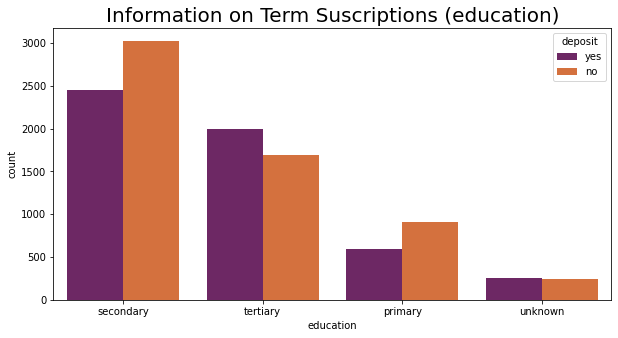

In [11]:
plt.figure(figsize=(10,5))
plt.title('Information on Term Suscriptions (education)', fontsize=20)

sns.countplot(x="education", hue="deposit", data=df,palette = 'inferno')

plt.show()

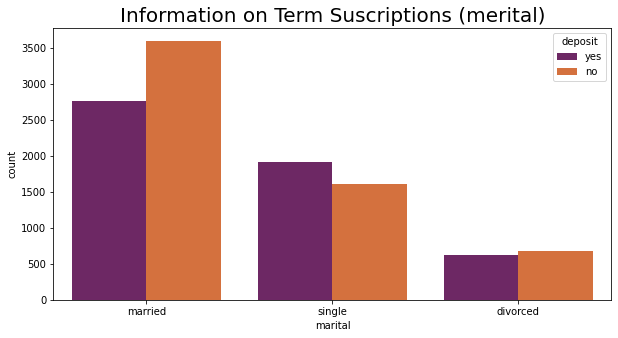

In [12]:
plt.figure(figsize=(10,5))
plt.title('Information on Term Suscriptions (merital)', fontsize=20)


sns.countplot(x="marital", hue="deposit", data=df,palette = 'inferno')

plt.show()


In [13]:
df=df[df['job']!="unknown"]
df["job"]=df["job"].replace("admin.","management")

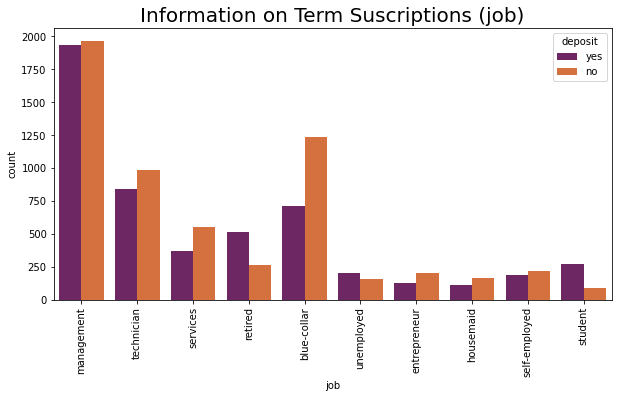

In [14]:
plt.figure(figsize=(10,5))
plt.title('Information on Term Suscriptions (job)', fontsize=20)
sns.countplot(x="job", hue="deposit", data=df,palette = 'inferno')
plt.xticks(rotation="vertical")
plt.show()

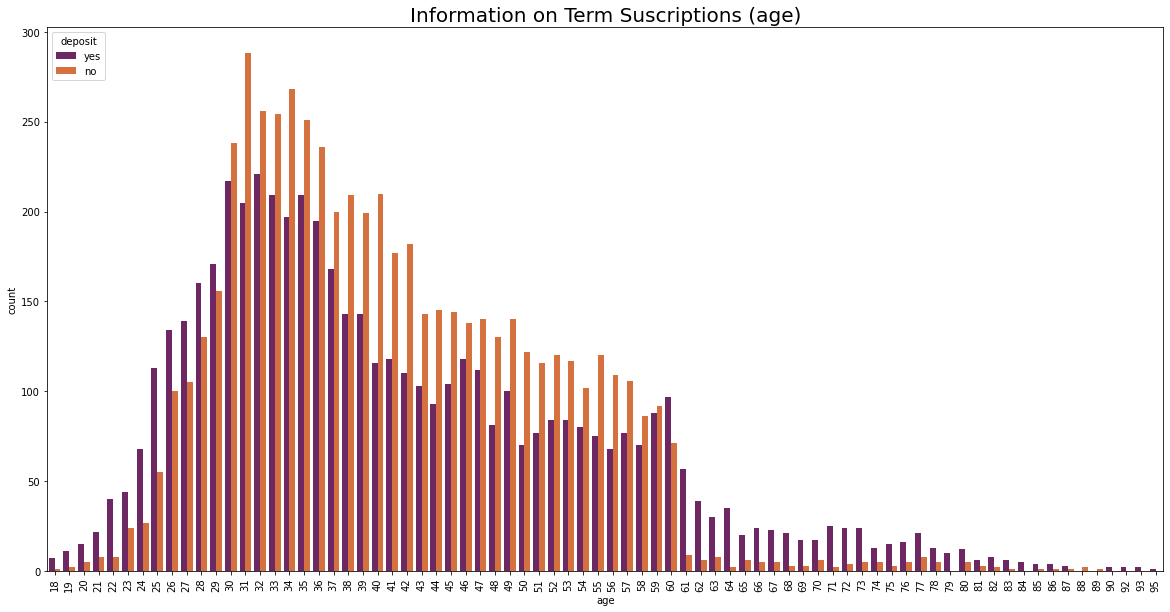

In [15]:
plt.figure(figsize=(20,10))
plt.title('Information on Term Suscriptions (age)', fontsize=20)
sns.countplot(x="age", hue="deposit", data=df,palette = 'inferno')
plt.xticks(rotation="vertical")
plt.show()

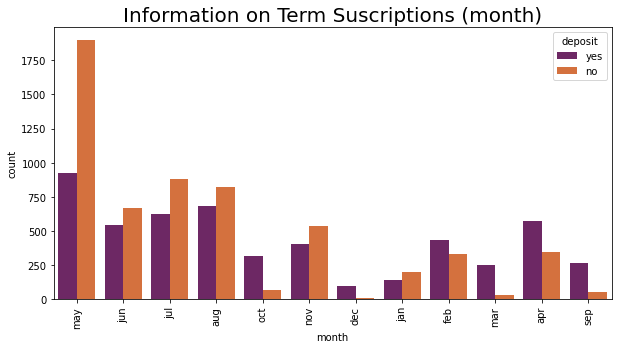

In [16]:
plt.figure(figsize=(10,5))
plt.title('Information on Term Suscriptions (month)', fontsize=20)
sns.countplot(x="month", hue="deposit", data=df,palette = 'inferno')
plt.xticks(rotation="vertical")
plt.show()

In [124]:
fig = go.Figure(data=[go.Pie(values=df['month'].value_counts()[:10], labels =df['month'].unique(), hole=.3)])
fig.update_layout(
                   title_text = 'Month focus',height=700,width=700,
                   title_font = dict(size=25,family='Verdana', 
                                     color='black'))

fig.show()

In [17]:

data = px.data.tips()
fig = px.box(df, x="job", y="age", color="deposit")


fig.show()

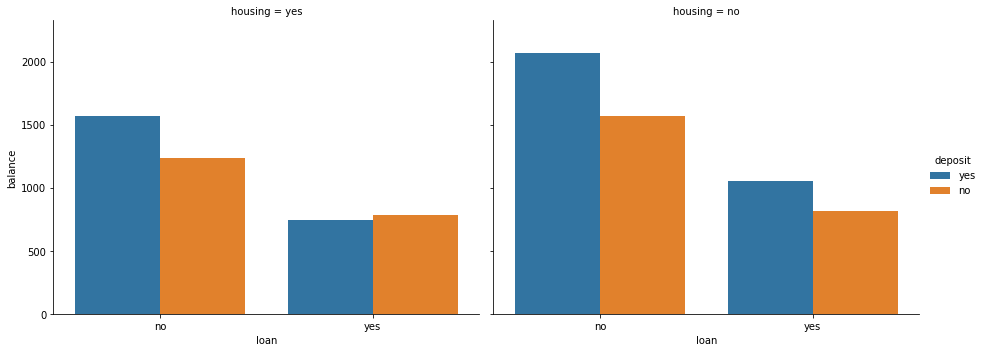

In [18]:
sns.catplot(x="loan", y="balance",
                hue="deposit", col="housing",
                data=df, kind="bar",errcolor="none",
                height=5, aspect=1.3);

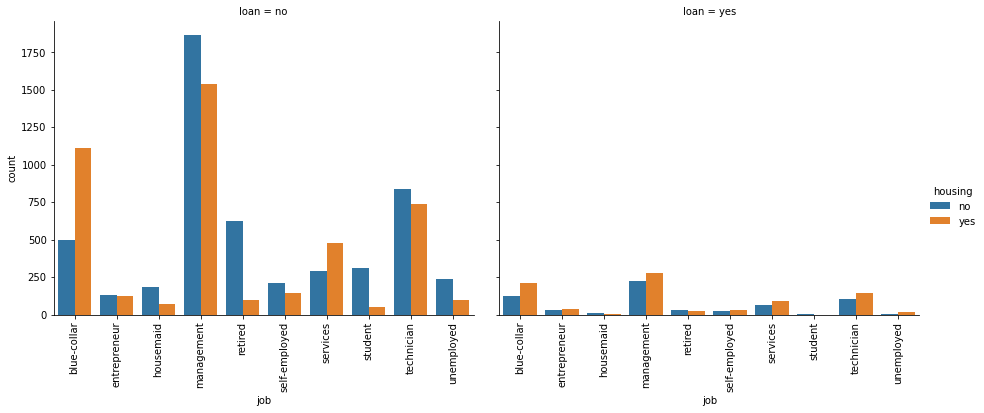

In [19]:
count=df.copy()
count['count']=1
count["job"]=count["job"].replace("admin.","management")
count=count.groupby(['job','housing','loan'], as_index=False)['count'].count()

chart=sns.catplot(x="job", y="count",
                hue="housing", col="loan",
                data=count, kind="bar",errcolor="none",
                height=5, aspect=1.3);
chart.set_xticklabels(rotation=90)


In [20]:
fig = go.Figure(data=[go.Pie(values=df['campaign'].value_counts(), labels =df['campaign'].unique(), hole=.3)])
fig.update_layout(
                   title_text = "Call's number",height=900,width=1400,
                   title_font = dict(size=25,family='Verdana', 
                                     color='black'))

fig.show()

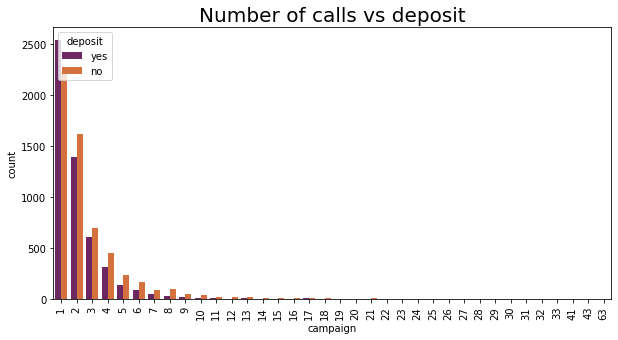

In [21]:

plt.figure(figsize=(10,5))
plt.title('Number of calls vs deposit', fontsize=20)
sns.countplot(x=df['campaign'],hue=df['deposit'],palette = 'inferno')
plt.xticks(rotation="vertical")
plt.show()

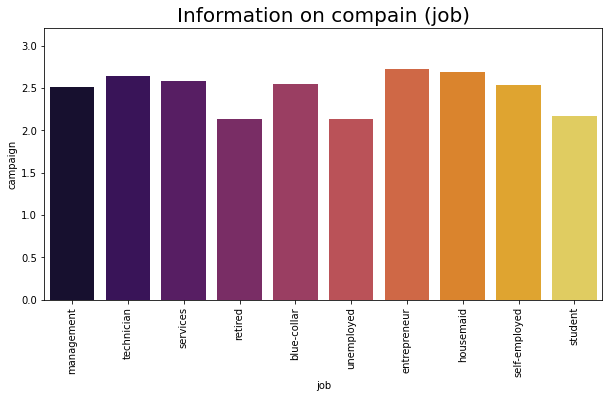

In [22]:
plt.figure(figsize=(10,5))
plt.title('Information on compain (job)', fontsize=20)
sns.barplot(x=df['job'],y=df['campaign'],errcolor="none",palette = 'inferno')
plt.xticks(rotation="vertical")
plt.show()

In [23]:
label = LabelEncoder()
df['deposit']=label.fit_transform(df['deposit'])

In [83]:

y = df.deposit
X = df.drop(['deposit'], axis=1)

# Divide data into training and validation subsets
X_train_full, X_valid_full, y_train, y_valid = train_test_split(X, y, train_size=0.8, test_size=0.2,
                                                                random_state=0)

# "Cardinality" means the number of unique values in a column
# Select categorical columns with relatively low cardinality (convenient but arbitrary)
categorical_cols = [cname for cname in X_train_full.columns if cname != 'month' and 
                        X_train_full[cname].dtype == "object"]

# Select numerical columns
numerical_cols = [cname for cname in X_train_full.columns if X_train_full[cname].dtype in ['int64', 'float64']]

# Keep selected columns only
my_cols = categorical_cols + numerical_cols+['month']
X_train = X_train_full[my_cols].copy()
X_valid = X_valid_full[my_cols].copy()


In [107]:
# Preprocessing for month feature

def trans_func(df_var):
    df_var['month']=df_var['month'].apply(lambda x: datetime.datetime.strptime(x, "%b").month)
    return df_var

transformer = FunctionTransformer(trans_func)
# Preprocessing for numerical data
numerical_transformer = StandardScaler()

# Preprocessing for categorical data
categorical_transformer = Pipeline(steps=[
   
    ('ordinal', OrdinalEncoder()),
     ('scaler', StandardScaler())
])

# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols),
        ('month', transformer,['month'])
    ])

In [117]:
model = RandomForestClassifier(n_estimators=100, random_state=0)

In [118]:

# Bundle preprocessing and modeling code in a pipeline
my_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('model', model)
                             ])

# Preprocessing of training data, fit model 
my_pipeline.fit(X_train, y_train)

# Preprocessing of validation data, get predictions
preds = my_pipeline.predict(X_valid)

# Evaluate the model
score = mean_absolute_error(y_valid, preds)
print('MAE:', score)

MAE: 0.15412347904461468


In [119]:
prediction = pd.DataFrame({
        
        "Revenue_pred":preds,  "Revenue":y_valid,
})
prediction.head(10)

,Revenue_pred,Revenue
3480,1,1
1038,1,1
5959,0,0
6537,0,0
4225,0,1
2665,1,1
10301,0,0
1842,1,1
1651,1,1
4827,1,1


In [120]:
#evaluating the model
cnf_matrix = metrics.confusion_matrix(y_valid, preds)
print(cnf_matrix)

[[970 222]
 [120 907]]


Text(0.5, 257.44, 'Predicted label')

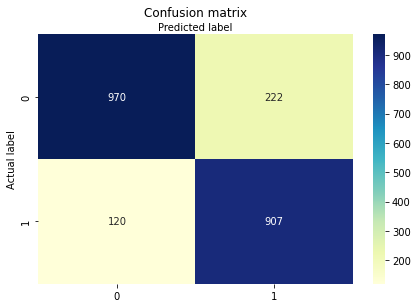

In [121]:
#make confusion matrix
class_names=[0,1] 
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [125]:
print("Accuracy:",metrics.accuracy_score(y_valid, preds))
print("Precision:",metrics.precision_score(y_valid, preds))
print("Recall:",metrics.recall_score(y_valid, preds))

Accuracy: 0.8458765209553853
Precision: 0.8033658104517272
Recall: 0.8831548198636806


In [129]:

!git init


Reinitialized existing Git repository in /content/.git/


In [130]:
!git add README.md



fatal: pathspec 'README.md' did not match any files


In [131]:
!git commit -m "first commit"


*** Please tell me who you are.

Run

  git config --global user.email "you@example.com"
  git config --global user.name "Your Name"

to set your account's default identity.
Omit --global to set the identity only in this repository.

fatal: unable to auto-detect email address (got 'root@0498ca0b9f2e.(none)')
